In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data import and data exploration

In [71]:
dat_lending_info = pd.read_csv("lending_club_info.csv")

In [72]:
dat_lending_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [73]:
dat_lending = pd.read_csv("lending_club_loan_two.csv")

In [74]:
dat_lending.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [75]:
dat_lending.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [76]:
dat_lending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [77]:
sns.set_style('whitegrid')

In [78]:
dat_lending['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

C:\Users\denni\anaconda3\envs\data-science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

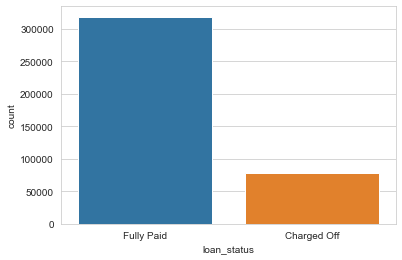

In [79]:
sns.countplot(dat_lending['loan_status'])

<Figure size 864x360 with 0 Axes>

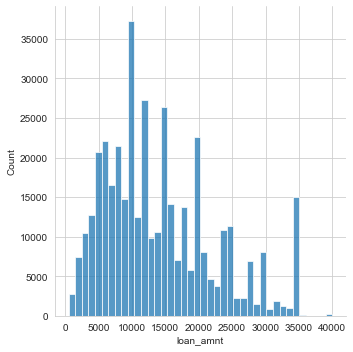

In [80]:
plt.figure(figsize=(12,5))
sns.displot(dat_lending['loan_amnt'], bins=40)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

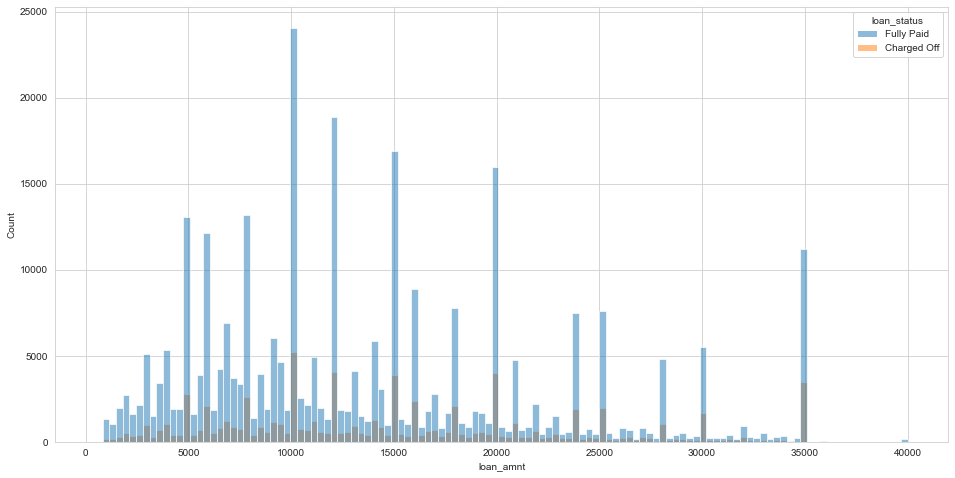

In [81]:
plt.figure(figsize=(16,8))
sns.histplot(data=dat_lending, x='loan_amnt', hue='loan_status')

<AxesSubplot:xlabel='grade', ylabel='count'>

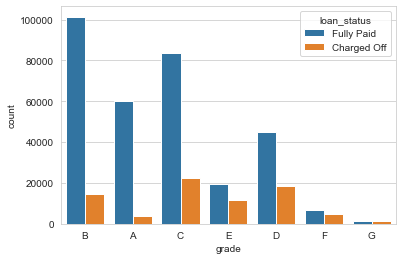

In [82]:
sns.countplot(x='grade', data=dat_lending, hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

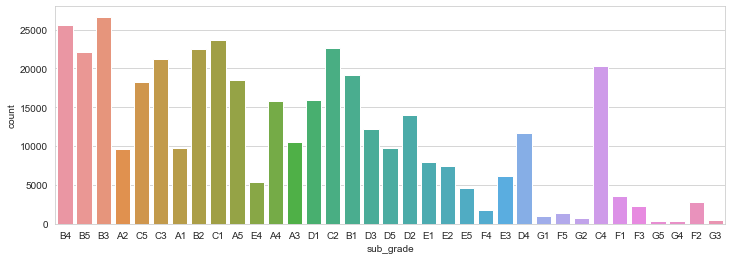

In [83]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=dat_lending)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

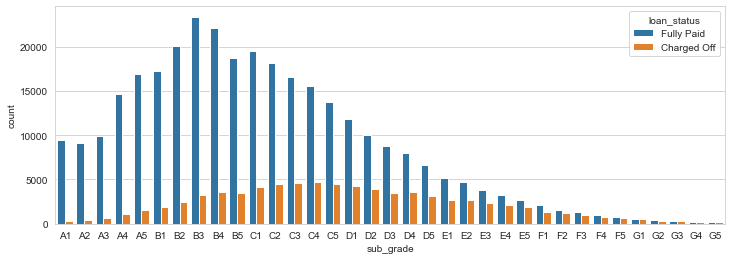

In [84]:
plt.figure(figsize=(12,4))
order = sorted(dat_lending['sub_grade'].unique())
sns.countplot(x='sub_grade', data=dat_lending, order=order, hue='loan_status')

In [85]:
dat_lending.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

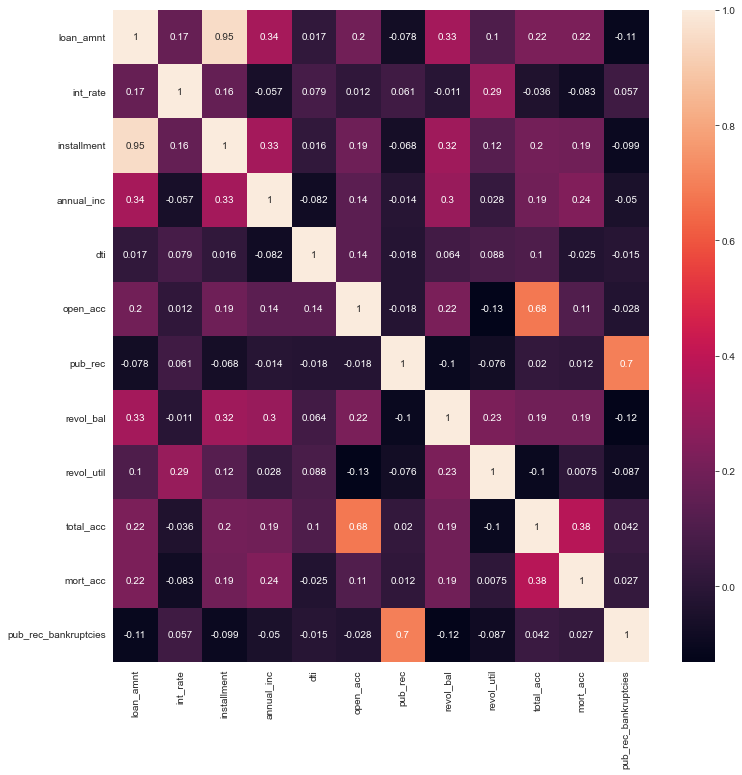

In [86]:
plt.figure(figsize=(12,12))
sns.heatmap(dat_lending.corr(), annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

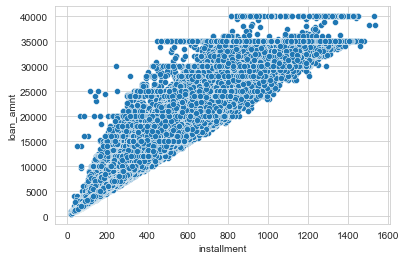

In [87]:
sns.scatterplot(data=dat_lending, x='installment', y='loan_amnt')

<AxesSubplot:xlabel='pub_rec', ylabel='pub_rec_bankruptcies'>

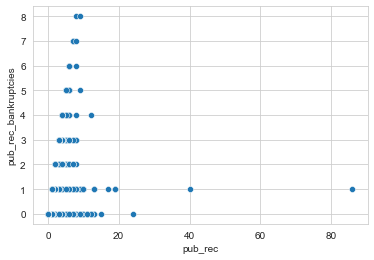

In [88]:
sns.scatterplot(data=dat_lending, x='pub_rec', y='pub_rec_bankruptcies')

# data preprocessing

**TASK:** Trying to figure out if the missing data can/should be replaced or if it should be dropped 

In [89]:
dat_lending.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [90]:
100 * dat_lending.isnull().sum() / len(dat_lending)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [91]:
len(dat_lending['emp_title'].unique())

173106

In [92]:
dat_lending = dat_lending.drop('emp_title', axis=1)

In [93]:
sorted(dat_lending['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [94]:
emp_length_order = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

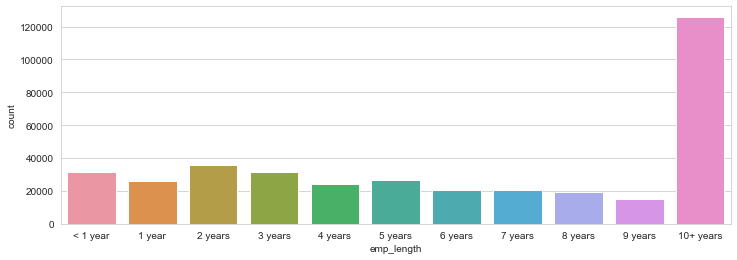

In [95]:
plt.figure(figsize=(12,4))
sns.countplot(data=dat_lending, x='emp_length', order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

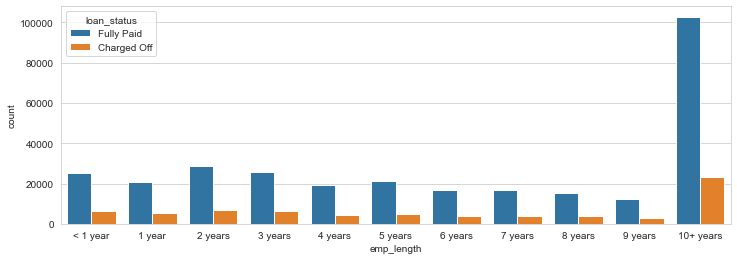

In [96]:
plt.figure(figsize=(12,4))
sns.countplot(data=dat_lending, x='emp_length', order=emp_length_order, hue='loan_status')

-> there is nothing significant that could contribute for the training

In [97]:
dat_lending = dat_lending.drop('emp_length', axis=1)

In [98]:
len(dat_lending['title'].unique())

48818

In [99]:
dat_lending = dat_lending.drop('title', axis=1)

In [100]:
dat_lending.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

-> total_acc seems to have a correlation with the mort_acc. So based of that we should be able to replace the missing data, because the amount of missing data isn't very huge

In [101]:
total_acc_avg = dat_lending.groupby('total_acc').mean()['mort_acc']

def fill_mort_acc(total_acc, mort_acc):
	if np.isnan(mort_acc):
		return total_acc_avg[total_acc]
	else:
		return mort_acc

In [105]:
dat_lending['mort_acc'] = dat_lending.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

## converting string columns to numerical if possible or needed

In [107]:
dat_lending['term'] = dat_lending['term'].apply(lambda term: int(term[:3]))

In [109]:
dat_lending['term'].value_counts()

36    302005
60     94025
Name: term, dtype: int64

In [110]:
dat_lending = dat_lending.drop('grade', axis=1)

### creating dummy variables

In [112]:
dummies = pd.get_dummies(dat_lending['sub_grade'], drop_first=True)
dat_lending = pd.concat([dat_lending.drop('sub_grade', axis=1), dummies], axis=1)

In [116]:
dummies = pd.get_dummies(dat_lending[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)
dat_lending = pd.concat([dat_lending.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), dummies], axis=1)

In [119]:
dat_lending['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

-> merging NONE and ANY column into other

In [121]:
dat_lending['home_ownership'] = dat_lending['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [122]:
dummies = pd.get_dummies(dat_lending[['home_ownership']], drop_first=True)
dat_lending = pd.concat([dat_lending.drop(['home_ownership'], axis=1), dummies], axis=1)

In [124]:
dat_lending['zip_code'] = dat_lending['address'].apply(lambda address: address[-5:])

In [127]:
dat_lending['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [128]:
dummies = pd.get_dummies(dat_lending[['zip_code']], drop_first=True)
dat_lending = pd.concat([dat_lending.drop(['zip_code'], axis=1), dummies], axis=1)